In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Data  Fashion MNIST
(images, targets), (images_test, targets_test) = tf.keras.datasets.fashion_mnist.load_data()
(images, targets), (images_test, targets_test) = (images[:10000], targets[:10000]), (images_test[:500], targets_test[:500])
images, images_test = images.reshape(images.shape[0], -1), images_test.reshape(images_test.shape[0], -1)
print("Train in: ", images.shape)
print("Train out: ", targets.shape)
print("Test in: ", images_test.shape)
print("Test out: ", targets_test.shape)

Train in:  (10000, 784)
Train out:  (10000,)
Test in:  (500, 784)
Test out:  (500,)


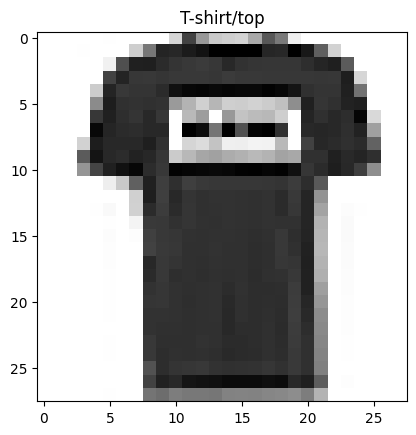

In [3]:
# Show Image

index_img = 1

targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.imshow(np.reshape(images[index_img], (28, 28)), cmap="binary")
plt.title(targets_names[targets[index_img]])
plt.show()

In [4]:
# Data Normalization
X_train, X_test = images/images.max(), images_test/images_test.max()
Y_train, Y_test = targets, targets_test

In [5]:
# Model


model = tf.keras.Sequential()

n_input = 28 * 28
n_out = 10
seed = 0

initW = tf.keras.initializers.GlorotUniform(seed=seed)
initB = tf.keras.initializers.GlorotUniform(seed=seed)

model.add(tf.keras.layers.Dense(units=n_input, activation="relu", input_shape=[n_input], kernel_initializer=initW, bias_initializer=initB)) 
model.add(tf.keras.layers.Dense(units=256, activation="relu", kernel_initializer=initW, bias_initializer=initB))  
model.add(tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer=initW, bias_initializer=initB))  
model.add(tf.keras.layers.Dense(units=n_out, activation="softmax",  kernel_initializer=initW, bias_initializer=initB)) 


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 850,586
Trainable params: 850,586
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0),
    metrics=["accuracy"]
)

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

history = model.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=2, epochs=100)

(10000, 784)
(10000,)
(500, 784)
(500,)
Epoch 1/100
5000/5000 [==============================] - 21s 4ms/step - loss: 0.7042 - accuracy: 0.7468 - val_loss: 0.5694 - val_accuracy: 0.7840
Epoch 2/100
5000/5000 [==============================] - 24s 5ms/step - loss: 0.4820 - accuracy: 0.8234 - val_loss: 0.4076 - val_accuracy: 0.8400
Epoch 3/100
5000/5000 [==============================] - 22s 4ms/step - loss: 0.4239 - accuracy: 0.8421 - val_loss: 0.4037 - val_accuracy: 0.8520
Epoch 4/100
5000/5000 [==============================] - 27s 5ms/step - loss: 0.3816 - accuracy: 0.8579 - val_loss: 0.4172 - val_accuracy: 0.8640
Epoch 5/100
5000/5000 [==============================] - 27s 5ms/step - loss: 0.3527 - accuracy: 0.8669 - val_loss: 0.3435 - val_accuracy: 0.8720
Epoch 6/100
5000/5000 [==============================] - 27s 5ms/step - loss: 0.3246 - accuracy: 0.8788 - val_loss: 0.3858 - val_accuracy: 0.8640
Epoch 7/100
5000/5000 [==============================] - 26s 5ms/step - loss: 0.3066

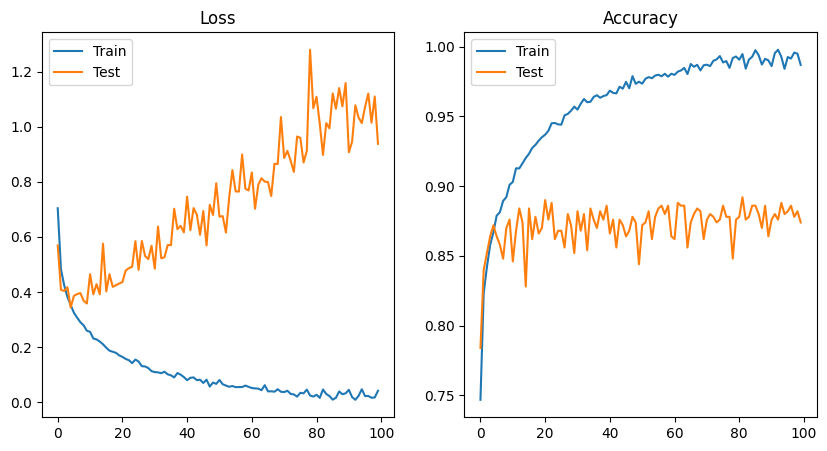

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Loss")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.subplot(1,2,2)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.show()

In [9]:
out = model.predict(X_test)
print("??? pred: ", targets_names[np.argmax(out[5])], " <==> true: ", targets_names[Y_test[5]])

16/16 [==============================] - 0s 3ms/step
??? pred:  Trouser  <==> true:  Trouser
